## ML PROJECT  HEALTHCARE

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
# read dataset
heart_df=pd.read_excel("C://Users/kandh/Desktop/simplilearn_code_practice/heart_data.xlsx")
heart_df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preliminary Analysis

In [65]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [66]:
heart_df.shape

(303, 14)

In [67]:
heart_df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [68]:
# Missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
 heart_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [70]:
heart_df.duplicated().sum()

1

In [71]:
heart_df.drop_duplicates(keep='first')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [72]:
heart_df.drop_duplicates(keep='first')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### STRUCTURE OF THE DATASET
    * Number of Rows    : 303
    * Number of columns : 14
    * All the columns are of numeric datatype 
    * The dataset does not contain any missing values
    * The dataset had 1 duplicate row and has being dropped 

### Statistical Analysis

In [8]:
heart_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


##### STATISTICAL OBSERVATIONS
    1) Average age is 54 years and the minimum age is 29 years.
    2) The average resting bp is 131 and its maximum value is 200.
    3) The average cholesterol level is 246 and the maximum value is 564 (this can be an outlier)
    4) The average heart rate is 149 and the maximum is 202 .


#### Classifying numeric and categorical columns

In [9]:

data_numerical = heart_df[['age','trestbps','chol','thalach','oldpeak','slope'] ]
data_numerical
data_categorical = heart_df[['sex','cp','fbs','restecg','exang','ca','thal','target']]
data_categorical

,sex,cp,fbs,restecg,exang,ca,thal,target
0,1,3,1,0,0,0,1,1
1,1,2,0,1,0,0,2,1
2,0,1,0,0,0,0,2,1
3,1,1,0,1,0,0,2,1
4,0,0,0,1,1,0,2,1
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0,3,0
299,1,3,0,1,0,0,3,0
300,1,0,1,1,0,2,3,0
301,1,0,0,1,1,1,3,0


In [75]:
data_numerical.skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
slope      -0.508316
dtype: float64

In [76]:


data_numerical.kurtosis()

age        -0.542167
trestbps    0.929054
chol        4.505423
thalach    -0.061970
oldpeak     1.575813
slope      -0.627521
dtype: float64

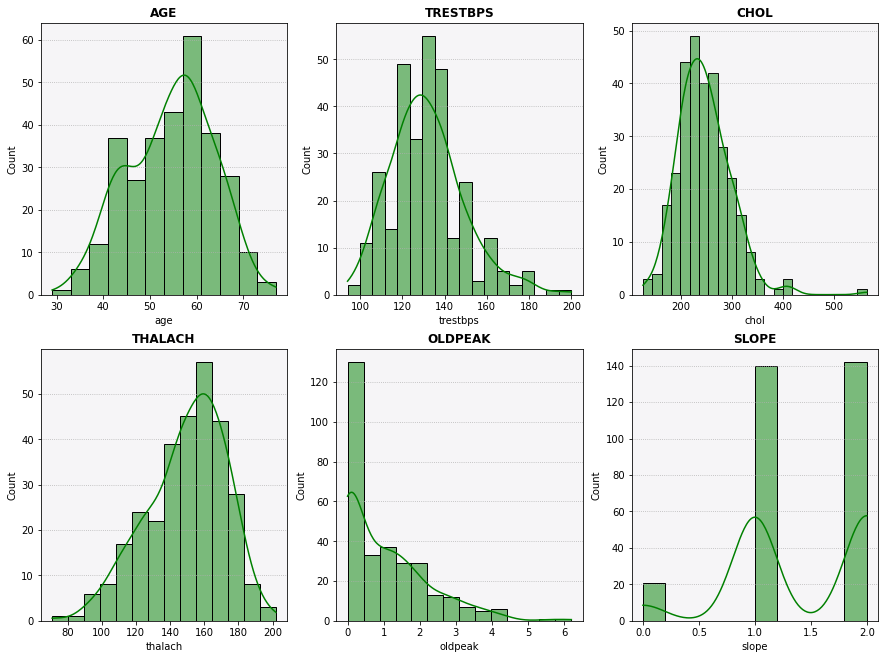

In [10]:
colors=['green']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
#fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_numerical.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    ax.grid(linestyle=':',axis='y')
    sns.histplot(data_numerical[val],kde=True,color='green')
    #plt.hist(data_numerical[val],kde=True,color='green')

#### OBSERVATIONS FROM NUMERICAL DATA

    *Age distribution appears normal with some skewness to the left.
    *Cholesterol appears normally distributed with few outliers.
    *The old peak is heavily skewed towards the right.
    *Resting bp appears to be normal with some skewness towards right.
    *The maximum heart rate appears normal with some skewness towards left.
    *Slope does not play much role in analysis

In [18]:

colors=['green','lightslategrey']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
#fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    ax.grid(linestyle=':',axis='y')
   sns.countplot(data_categorical[val],palette=colors)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

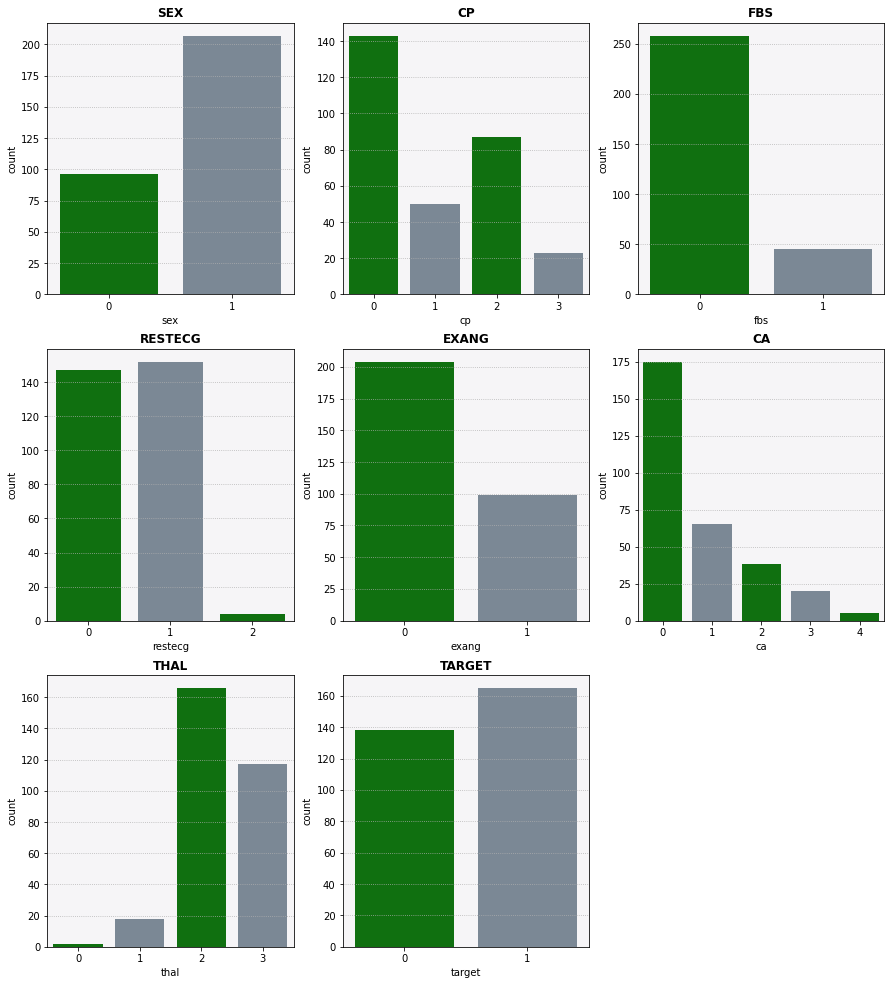

In [22]:
colors=['green','lightslategrey']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
#fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette=colors)


#### OBSERVATIONS FROM CATEGORICAL DATA
        * The number of males are  more than the number of females in our data (male=1 , female = 0).
        
        * People with type 0 chest pain (typical angina) are way more in number than the other groups. 
          Type 3 cp (asymptomatic) are in the least ammount.          
          
        * People with fasting blood sugar <120 are greater in number than people with blood sugar levels>120.
        
        * Restecg 0 ( normal) and 1(having ST-T wave abnormality) are almost equal in number.Type 2 is almost negligible.
        
        * People without exang (0) are almost double the amount of people with 
          exang(people having pain in chest due to excercise).
          
        * People with blood vessels 0 occupy most amount of our data. More number of heart attacks 
          were observed when CA=0.                    
          
        * People with thal 2 are more in number.

### ANALYSIS OF NUMERIC DATA (VS) TARGET

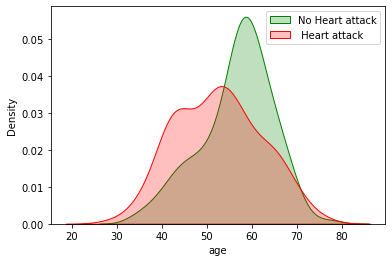

In [79]:
sns.kdeplot(x=heart_df.loc[heart_df['target']==0]['age'],color='green',label='No Heart attack',shade=True)
sns.kdeplot(x=heart_df.loc[heart_df['target']==1]['age'],color='red',label=' Heart attack',shade=True)
plt.legend()

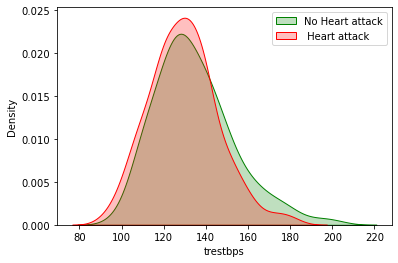

In [80]:
sns.kdeplot(x=heart_df.loc[heart_df['target']==0]['trestbps'],color='green',label='No Heart attack',shade=True)
sns.kdeplot(x=heart_df.loc[heart_df['target']==1]['trestbps'],color='red',label=' Heart attack',shade=True)
plt.legend()

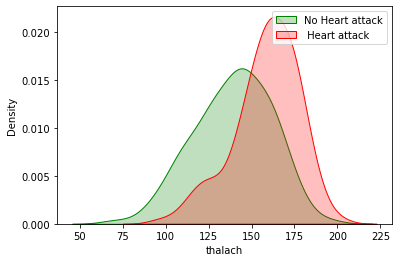

In [81]:
sns.kdeplot(x=heart_df.loc[heart_df['target']==0]['thalach'],color='green',label='No Heart attack',shade=True)
sns.kdeplot(x=heart_df.loc[heart_df['target']==1]['thalach'],color='red',label=' Heart attack',shade=True)
plt.legend()

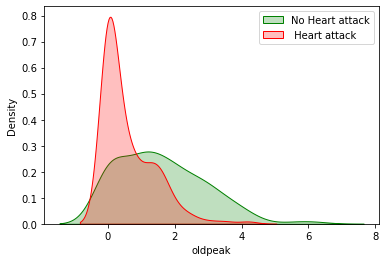

In [82]:
sns.kdeplot(x=heart_df.loc[heart_df['target']==0]['oldpeak'],color='green',label='No Heart attack',shade=True)
sns.kdeplot(x=heart_df.loc[heart_df['target']==1]['oldpeak'],color='red',label=' Heart attack',shade=True)
plt.legend()

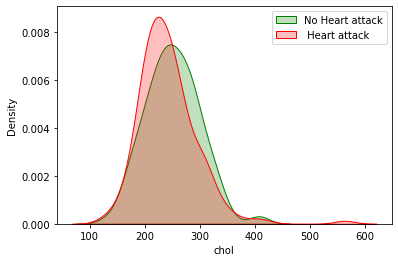

In [83]:
sns.kdeplot(x=heart_df.loc[heart_df['target']==0]['chol'],color='green',label='No Heart attack',shade=True)
sns.kdeplot(x=heart_df.loc[heart_df['target']==1]['chol'],color='red',label=' Heart attack',shade=True)
plt.legend()

#### OBSERVATIONS FROM NUMERICAL DATA (vs) TARGET
        * People with lower age (45-55)have more chances of getting heart attacks than those of higher ages.

        * People with oldpeak of 0 experience more heart attacks than others.
        
        * People with resting bp above 150 seems to experience less heart attack than others.
          Resting bp between 120-140 have more chances of heart attacks.
          
        * Cholesterol levels 200-270 shows more heart attacks.

        * People with maximum heart rate above 140 experience more heart attacks than others. 

### ANALYSIS OF CATERGORICAL DATA (VS) TARGET

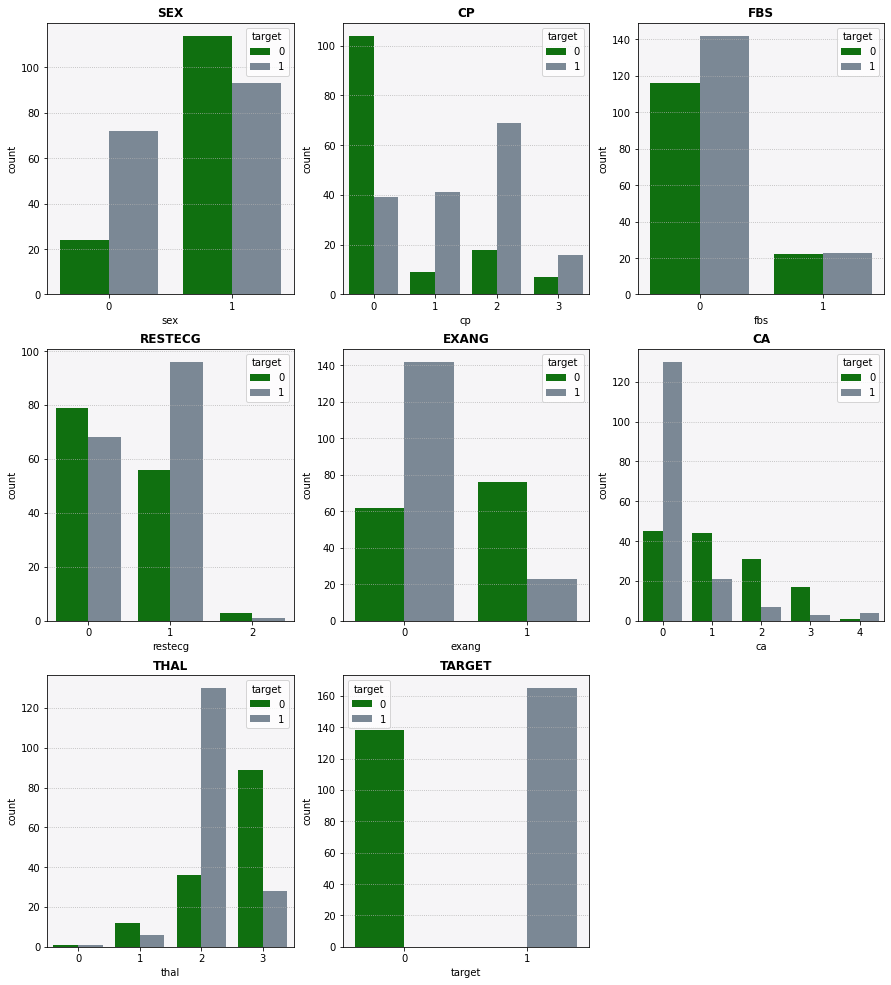

In [20]:
colors=['green','lightslategrey']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
#fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette=colors,hue=heart_df['target'])

#### OBSERVATIONS FROM CATEGORICAL DATA (vs) TARGET
        * Men experience more heart attacks than women.
        
        * People with type 2 chest pain(atypical angina) are more prone to heart attacks than any other type of chest pain;.
        
        * People with fasting blood sugar < 120 experienced more heart attacks.
        
        * People with type 1 restecg(having ST-T wave abnormality) experienced the highest heart attacks
          People with normal restecg also experiencecd heart attacks a lot.Type 2 restesg can be ignored.
          
        * People with exercise induced angina are more prone to heart attacks.
        
        * People with 0 number of major blood vessels experienced the highest amount of heart attacks (expected) .

<Figure size 2000x1500 with 0 Axes>

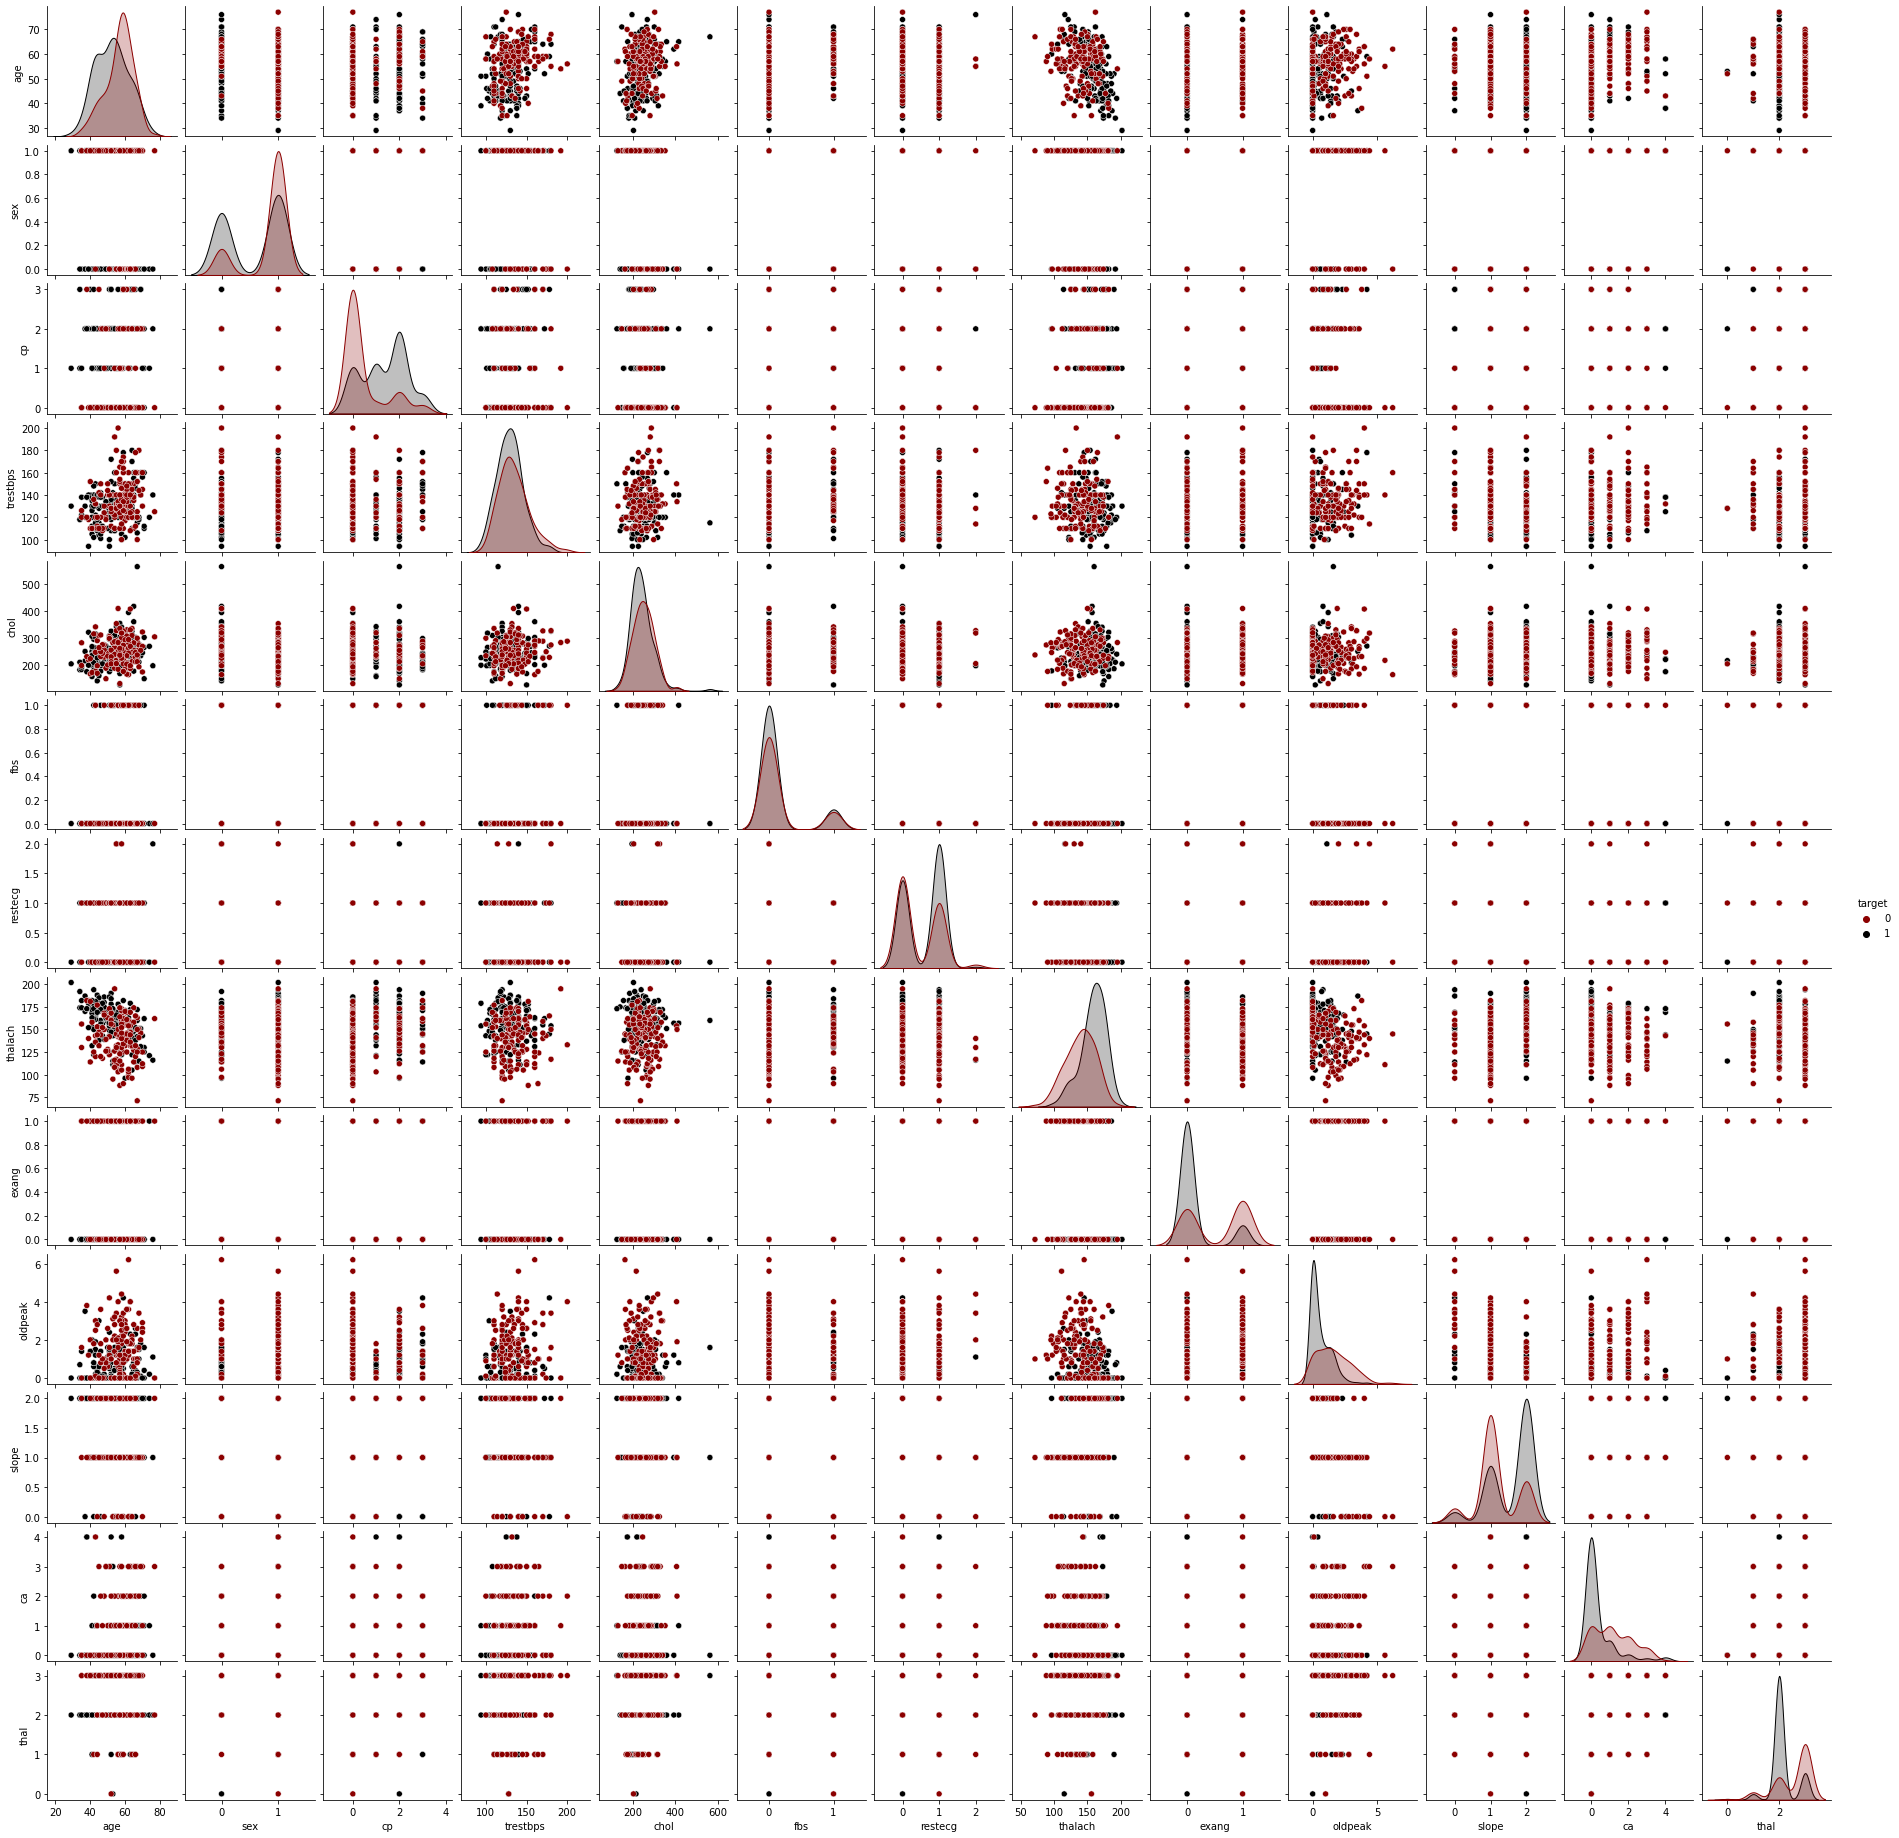

In [85]:
#sns.pairplot(data=heart_df)
fig=plt.figure(figsize=(20,15),dpi=100)
colors=['darkred','black']
sns.pairplot(data=heart_df,hue='target',size=2,palette=colors)
plt.show()

<AxesSubplot:>

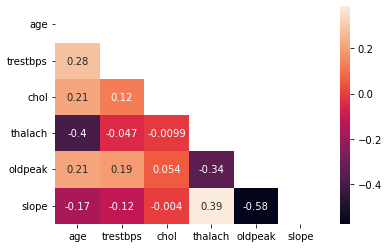

In [88]:
import numpy as np
matrix=np.triu(data_numerical.corr())
sns.heatmap(data=data_numerical.corr(),annot=True, mask=matrix)


#### OBSERVATIONS FROM HEATMAP
        * There does not exist much relationship between the numerical data.
        * The maximum heart rate achieved(thalach) has negative correlation with all the other data.
        * Other features are positvely correlated to each other.
        
        

### Model Building
    *The numerical data values are standardized using the StandardScalar library
    *The categorical data values are  encoded using one-hot-encoding
    *The dataset is split into train and test set
    *Different ML algorithms are applied to the dataset and their accuracies are compared and analysed


In [89]:
from sklearn.preprocessing import StandardScaler


In [90]:
sc = StandardScaler()
scaled_df = sc.fit_transform(data_numerical)
scaled_df = pd.DataFrame(scaled_df, columns =['age','trestbps','chol','thalach','oldpeak','slope'])
scaled_df

,age,trestbps,chol,thalach,oldpeak,slope
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-2.274579
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-2.274579
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0.976352
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.976352
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0.976352
...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,-0.649113
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,-0.649113
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,-0.649113
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,-0.649113


In [91]:
# One-Hot encoding of Categorical Variables
data_dummies=data_categorical
data_dummies= pd.get_dummies(data_dummies,columns=['sex','cp','fbs','restecg','exang','ca','thal'])
data_dummies

,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,...,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
299,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0,0,1,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1


In [94]:
# Merging standadized numerical and encoded categorical data together
Heart_df=scaled_df
#heart_df.drop(columns=['sex','cp','fbs','restecg','exang','ca','thal'],inplace=True)
Heart_df=Heart_df.merge(data_dummies,left_index=True, right_index=True,how='left')
Heart_df.head().T

,0,1,2,3,4
age,0.952197,-1.915313,-1.474158,0.180175,0.290464
trestbps,0.763956,-0.092738,-0.092738,-0.663867,-0.663867
chol,-0.256334,0.072199,-0.816773,-0.198357,2.082050
thalach,0.015443,1.633471,0.977514,1.239897,0.583939
oldpeak,1.087338,2.122573,0.310912,-0.206705,-0.379244
slope,-2.274579,-2.274579,0.976352,0.976352,0.976352
target,1.000000,1.000000,1.000000,1.000000,1.000000
sex_0,0.000000,0.000000,1.000000,0.000000,1.000000
sex_1,1.000000,1.000000,0.000000,1.000000,0.000000
cp_0,0.000000,0.000000,0.000000,0.000000,1.000000


In [93]:
Y=Heart_df['target']
Heart_df.drop(columns=['slope','target'],inplace=True)
X=Heart_df

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test, Y_train , Y_test=train_test_split(X,Y,test_size=.2, random_state=21) 

In [28]:
print("X_train shape",X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape",Y_test.shape)

X_train shape (242, 27)
Y_train shape (242,)
X_test shape (61, 27)
Y_test shape (61,)


In [95]:
# Standardizing the training and testing data.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [97]:
modelLr=LogisticRegression()

modelLr.fit(X_train,Y_train)
Y_test_predict=modelLr.predict(X_test)


In [98]:
Y_train_predict=modelLr.predict(X_train)


In [99]:
print("The Prediction accuracy of the Logistic Regression model on testing data is:")
modelLr.score(X_test,Y_test)

The Prediction accuracy of the Logistic Regression model on testing data is:


0.819672131147541

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100)

In [101]:
rfc_model.fit(X_train,Y_train)

RandomForestClassifier()

In [102]:
y_test_pred_rfc = rfc_model.predict(X_test)

print("The Prediction accuracy of the RFC model on testing data is: " , 
      accuracy_score(Y_test,y_test_pred_rfc))

The Prediction accuracy of the RFC model on testing data is:  0.8032786885245902


In [103]:
from sklearn.ensemble import AdaBoostClassifier


In [104]:
ada_model = AdaBoostClassifier(n_estimators = 100)

ada_model.fit(X_train,Y_train)

y_test_pred_ada = ada_model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score

print("The accuracy score the Adaboost model with 80 estimators on the test dataset is : " , 
      accuracy_score(Y_test,y_test_pred_ada ))

The accuracy score the Adaboost model with 80 estimators on the test dataset is :  0.7377049180327869


In [106]:
y_train_pred_ada = ada_model.predict(X_train)

print("The accuracy score the Adaboost model with 80 estimators on the train dataset is : " , 
      accuracy_score(Y_train,y_train_pred_ada ))

The accuracy score the Adaboost model with 80 estimators on the train dataset is :  0.9793388429752066


In [107]:
import xgboost as xgb


In [108]:
D_train = xgb.DMatrix(X_train, label = Y_train)
D_test = xgb.DMatrix(X_test)

In [109]:
params = {"eta":0.02,"objective":"multi:softmax","num_class":3}


In [110]:
xgb_model = xgb.train(params,D_train)


In [111]:
y_test_pred_xgboost = xgb_model.predict(D_test)

print( "Accuracy score of xgb model on test data is : ", 
      accuracy_score(Y_test,y_test_pred_xgboost ))

Accuracy score of xgb model on test data is :  0.8032786885245902


In [112]:
from xgboost.sklearn import XGBClassifier

xgb_clf_model = XGBClassifier(objective = "multi:softmax", num_class = 3, max_depth=2)
xgb_clf_model.fit(X_train, Y_train)

y_pred = xgb_clf_model.predict(X_test)

print( "Accuracy score of xgb model on test data is : ", 
      accuracy_score(Y_test,y_pred ))


Accuracy score of xgb model on test data is :  0.7868852459016393


#### Various ML algorithms were applied to the data of which RFC had better accuracy 